In [ ]:
import pandas as pd
data=pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x=data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
k_means.fit(x)

KMeans(n_clusters=5)

In [ ]:
wcss=[]
for k in range(1,11):
    k_means=KMeans(n_clusters=k)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

In [ ]:
wcss

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 38858.959975143895,
 30566.45113025185,
 29114.982287331215,
 23263.094117320576,
 21320.430437549905]

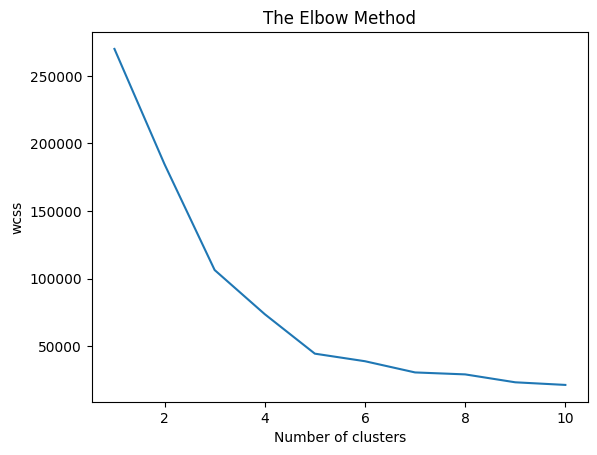

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
# Training our Model
x=data[['Annual Income (k$)','Spending Score (1-100)']]
k_means=KMeans(n_clusters=5,random_state=42)
y_means=k_means.fit_predict(x)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
k_means.predict([[15,39]])


array([4], dtype=int32)

In [ ]:
import joblib
joblib.dump(k_means,'Customer Segmentation')

['Customer Segmentation']

In [ ]:
model= joblib.load('Customer Segmentation')

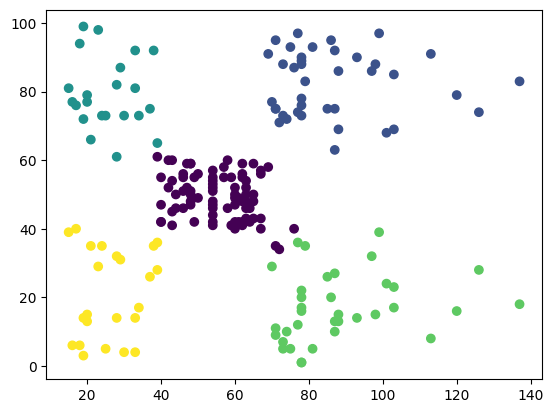

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=model.labels_)
plt.show()

In [ ]:
# Post Lab

import pandas as pd
import joblib
from tkinter import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans

df = pd.read_csv("Placement.csv")
x = df[['cgpa', 'package']]

# Initialize KMeans with the desired number of clusters
k_mean = KMeans(n_clusters=5, random_state=42)
y_mean = k_mean.fit_predict(x)

def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())

    result = k_mean.predict([[p1, p2]])
    print("This student belongs to cluster no:", result[0])

    cluster_info = {
        0: "students with medium CGPA and medium package",
        1: "students with high CGPA and low package",
        2: "students with low CGPA and low package",
        3: "students with low CGPA and high package",
        4: "students with high CGPA and high package"
    }
    # Clear previous labels if any
    for widget in master.grid_slaves():
        if int(widget.grid_info()["row"]) >= 4:  # Assuming info labels start from row 4
            widget.destroy()

    Label(master, text=cluster_info[result[0]]).grid(row=4)

master = Tk()
master.title("Student Placement Segmentation by Vishal Boss")

# Title label
Label(master, text="Student Placement Segmentation using Machine Learning", bg="Yellow", fg="black").grid(row=0, columnspan=2)

# Input labels and entries
Label(master, text="CGPA").grid(row=1)
Label(master, text="Package").grid(row=2)
e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
Button(master, text='Predict', command=show_entry_fields).grid(row=3)

# Plotting
figure3 = plt.Figure(figsize=(5, 4), dpi=100)
ax3 = figure3.add_subplot(111)

# Sample scatter plot for clusters
# Plot the existing clusters
for i in range(5):  # Since n_clusters=5
    ax3.scatter(x.iloc[y_mean == i, 0], x.iloc[y_mean == i, 1], s=100, label=f'Cluster {i}')

# Set labels and title
ax3.set_xlabel('CGPA')
ax3.set_ylabel('Package')
ax3.set_title('CGPA vs Package')
ax3.legend()

# Displaying figure in Tkinter
scatter3 = FigureCanvasTkAgg(figure3, master)
scatter3.get_tk_widget().grid(row=5, columnspan=2)

# Run the application
master.mainloop()

